**Devon Boldt Information Visualization HW4**




**Total Attendance Over Time**

- **Mappings**: The x-axis represents `Date.Full` (date of attendance), and the y-axis represents `Statistics.Attendance` (total attendance), using a line plot to show trends over time.
- **Color Mapping**: A single-color line plot is used to ensure clear visibility of attendance trends.
- **Task**: This visualization supports analyzing attendance trends over time to identify seasonal patterns or significant events affecting attendance.
- **Insight**: The graph reveals periodic fluctuations in attendance, suggesting potential seasonality in Broadway attendance patterns.

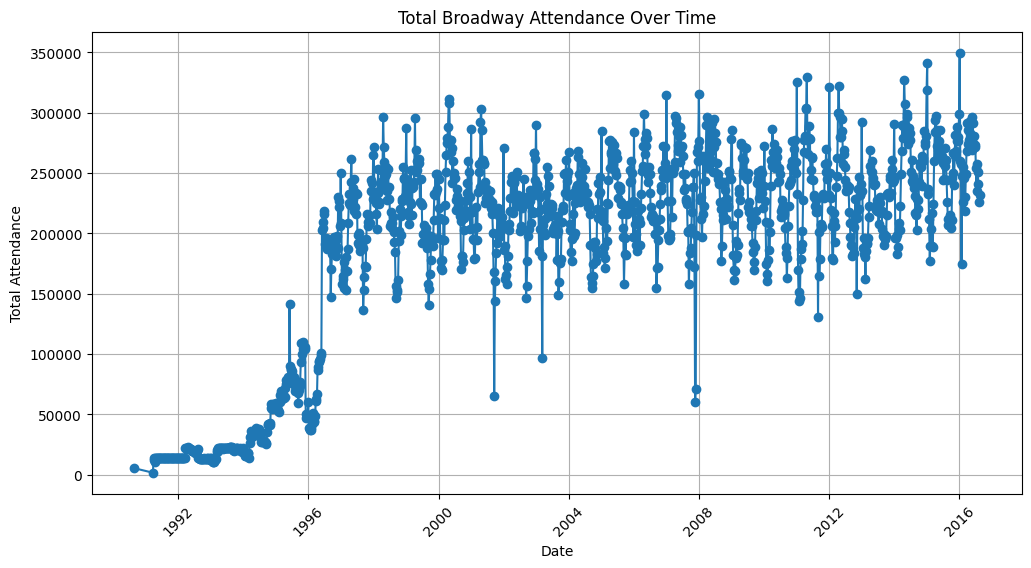

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "broadway.csv"
df = pd.read_csv(file_path)

# Convert Date.Full to datetime format for time series plots
df['Date.Full'] = pd.to_datetime(df['Date.Full'])

# Total Attendance Over Time
attendance_over_time = df.groupby('Date.Full')['Statistics.Attendance'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(attendance_over_time['Date.Full'], attendance_over_time['Statistics.Attendance'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Attendance')
plt.title('Total Broadway Attendance Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


&nbsp;

**Top 10 Broadway Shows by Total Gross Revenue**

- **Mappings**: The x-axis represents `Statistics.Gross` (total revenue), and the y-axis represents `Show.Name` (show titles), using a horizontal bar chart to compare revenues.
- **Color Mapping**: A `viridis` color palette is used to differentiate shows while maintaining visual appeal.
- **Task**: This visualization supports identifying the highest-grossing Broadway shows to understand which productions generate the most revenue.
- **Insight**: A small number of shows contribute disproportionately to Broadway’s total revenue, highlighting blockbuster productions.

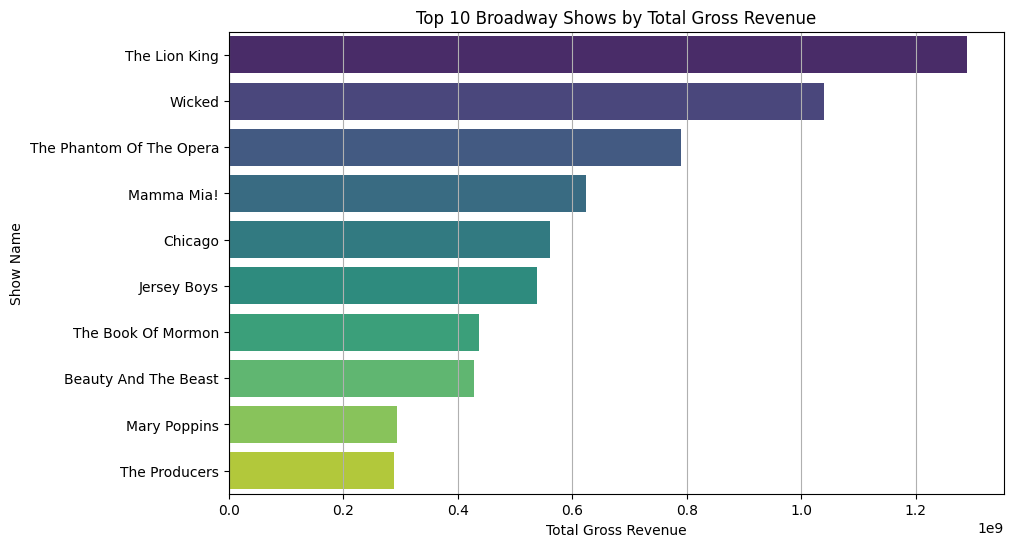

In [ ]:
# Visualization 2: Top 10 Shows by Total Gross Revenue
top_grossing_shows = df.groupby('Show.Name')['Statistics.Gross'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_grossing_shows['Show.Name'],
    x=top_grossing_shows['Statistics.Gross'],
    hue=top_grossing_shows['Show.Name'],  # Assign hue
    palette='viridis',
    legend=False  # Hide the redundant legend
)
plt.xlabel('Total Gross Revenue')
plt.ylabel('Show Name')
plt.title('Top 10 Broadway Shows by Total Gross Revenue')
plt.grid(axis='x')
plt.show()


&nbsp;

**Distribution of Broadway Show Gross Revenue**

- **Mappings**: The x-axis represents `Statistics.Gross` (gross revenue), and the y-axis represents the frequency of shows within revenue bins, using a histogram.
- **Color Mapping**: A single-color histogram with a KDE overlay enhances visibility of revenue distribution.
- **Task**: This visualization helps analyze the distribution of Broadway show revenues to understand variance and common revenue ranges.
- **Insight**: The distribution is right-skewed, indicating that while most shows earn moderate revenues, a few achieve exceptionally high earnings.

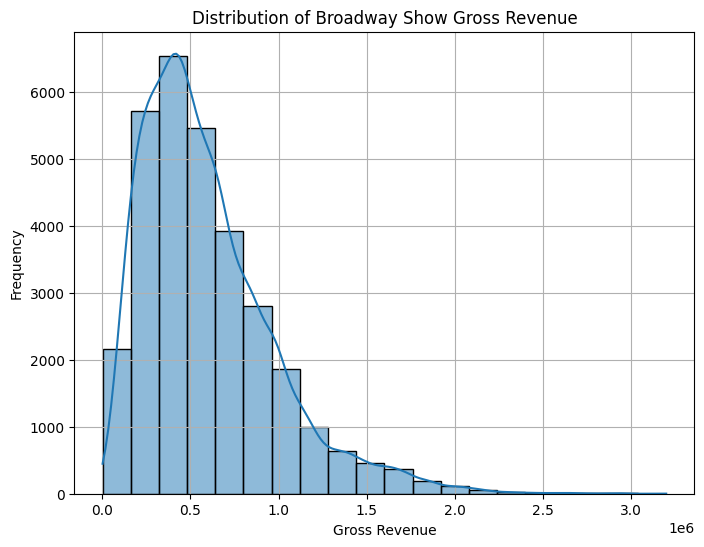

In [ ]:
# Plot: Gross Revenue Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Statistics.Gross'], bins=20, kde=True)
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Broadway Show Gross Revenue')
plt.grid(True)
plt.show()


&nbsp;

**Relationship Between Attendance and Gross Revenue**

- **Mappings**: The x-axis represents `Statistics.Attendance` (attendance per show), and the y-axis represents `Statistics.Gross` (gross revenue), using a scatter plot.
- **Color Mapping**: A single-color scatter plot with transparency (`alpha=0.5`) ensures overlapping points remain visible.
- **Task**: This visualization helps determine whether higher attendance strongly correlates with higher revenue.
- **Insight**: While there is a general positive correlation, some shows achieve high revenue even with moderate attendance, likely due to higher ticket prices.

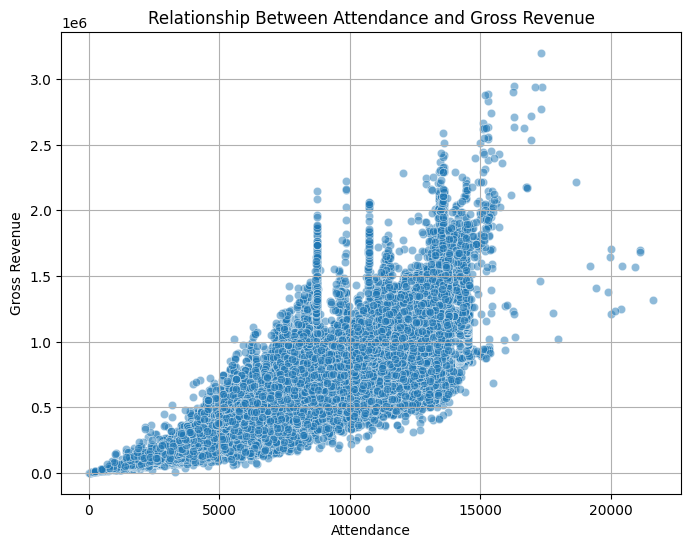

In [ ]:
# Visualization 4: Relationship Between Attendance and Gross Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Statistics.Attendance'], y=df['Statistics.Gross'], alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Gross Revenue')
plt.title('Relationship Between Attendance and Gross Revenue')
plt.grid(True)
plt.show()


&nbsp;

**Top 5 Theatres by Total Attendance**

- **Mappings**: The pie chart slices represent `Statistics.Attendance` (total attendance per theatre), with labels for each theatre.
- **Color Mapping**: A distinct color is used for each theatre to ensure differentiation.
- **Task**: This visualization supports identifying the most attended theatres, highlighting venue popularity.
- **Insight**: A small number of theatres dominate total attendance, suggesting they host the most popular or longest-running shows.

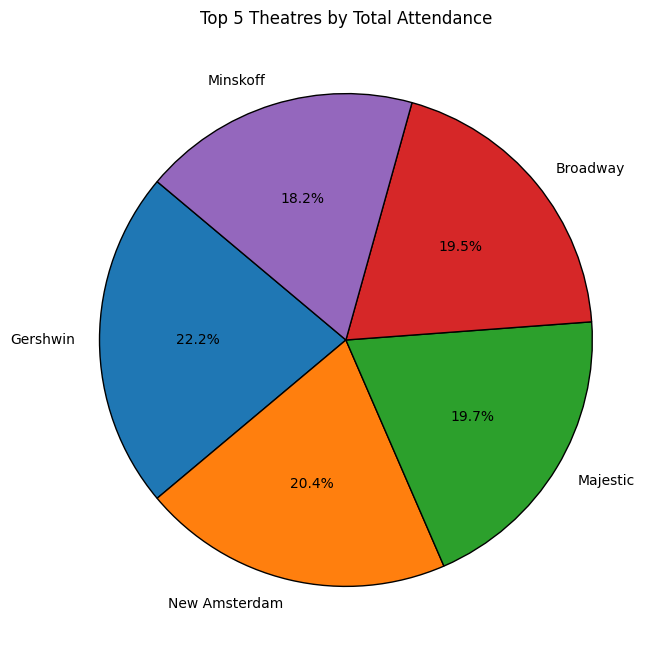

In [ ]:
# Group by theatre and sum total attendance, then get the top 5
top_theatres = df.groupby('Show.Theatre')['Statistics.Attendance'].sum().nlargest(5)

# Plot: Top 5 Theatres by Total Attendance (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(top_theatres, labels=top_theatres.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Top 5 Theatres by Total Attendance')
plt.show()


&nbsp;